# Make Artificial Songs

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir
from starling_rhythm import synth

In [2]:
bID = 's_b1555_22'

In [3]:
bID_DIR = PROCESSED_DIR / bID
SAVE_PATH = bID_DIR / 'quant_stimuli.pickle'

## Dump into DataFrame

In [4]:
import pandas as pd
import numpy as np

In [5]:
n_jobs = 42
verbose = 0

In [6]:
stimuli_df = pd.read_pickle(SAVE_PATH)

In [7]:
stimuli_df.head()

file       type  dummy_id  \
1    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...  empirical         1   
151  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...  quantized         1   
2    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...  empirical         2   
152  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...  quantized         2   
3    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...  empirical         3   

        sr  length  length_sec  \
1    48000  467898    9.747875   
151  48000  465593    9.699854   
2    48000  454744    9.473833   
152  48000  455697    9.493688   
3    48000  447108    9.314750   

                                                SDoTMF      m_tmf designation  \
1    [23.582293023398297, 21.54347254327196, 23.184...  21.458296    training   
151  [24.68210416533953, 20.588173892799507, 21.303...  20.607348    training   
2    [16.044167617020115, 15.4896729293826, 25.3245...  16.941647    training   
152  [13.611158986430917, 12.57878418107557, 13.259...  14.544084    training   
3    [7.604842226937729, 8.30455527859745, 10.11596...   9.604076    training   

     config_id                 stim_name  \
1            0  empirical_0_training.wav   
151          0  quantized_0_training.wav   
2            1  empirical_1_training.wav   
152          1  quantized_1_training.wav   
3            2  empirical_2_training.wav   

                                             stim_path  
1    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...  
151  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...  
2    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...  
152  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...  
3    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...

## analyze length

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='length_sec', ylabel='Count'>

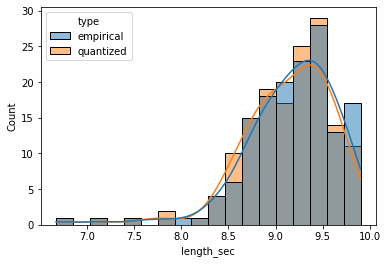

In [9]:
sns.histplot(data = stimuli_df, x = 'length_sec', hue = 'type', kde = True)

In [10]:
from scipy.stats import ks_2samp

In [11]:
ks_2samp(
    data1 = stimuli_df[stimuli_df['type'] == 'empirical'].length_sec.values,
    data2 = stimuli_df[stimuli_df['type'] == 'quantized'].length_sec.values,
    alternative = 'two_sided',
    method = 'auto'
)

KstestResult(statistic=0.06666666666666667, pvalue=0.8943205382966369)

Length is not statistically different across type

## analyze tMF

<AxesSubplot:xlabel='m_tmf', ylabel='Count'>

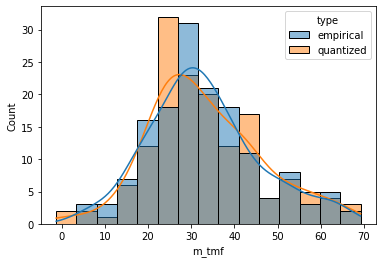

In [19]:
sns.histplot(data = stimuli_df, x = 'm_tmf', hue = 'type', kde = True)

In [20]:
ks_2samp(
    data1 = stimuli_df[stimuli_df['type'] == 'empirical'].m_tmf.values,
    data2 = stimuli_df[stimuli_df['type'] == 'quantized'].m_tmf.values,
    alternative = 'two_sided',
    method = 'auto'
)

KstestResult(statistic=0.07333333333333333, pvalue=0.8164826980883894)

In [21]:
dif_scores = []

for dummy_id in np.unique(stimuli_df['dummy_id']):
    pair = stimuli_df[stimuli_df['dummy_id'] == dummy_id]
    emp_tmf = pair[pair['type'] == 'empirical'].m_tmf.values[0]
    qua_tmf = pair[pair['type'] == 'quantized'].m_tmf.values[0]
    dif_scores.append(emp_tmf - qua_tmf)

<AxesSubplot:ylabel='Count'>

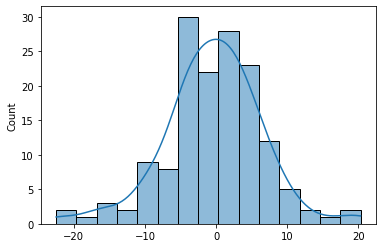

In [25]:
sns.histplot(data = dif_scores, kde = True)

In [26]:
import scipy.stats

In [27]:
scipy.stats.ttest_1samp(dif_scores, popmean = 0)

Ttest_1sampResult(statistic=-0.7491097579077323, pvalue=0.4549720507203313)

## listen stimuli set

In [20]:
select_df = stimuli_df[(stimuli_df['designation'] == 'training') & (stimuli_df['config_id'] == 2)]

In [21]:
select_df.file.values

array([PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/templatingFalse-empiricalstrict/s_b1555_22_2022-09-20_20-00-01-01_1125615_1149425_seg_5.0_15.0_templatingFalse-empiricalstrict_0_.wav'),
       PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/templatingTrue-transition_gap_profilesstrict/s_b1555_22_2022-09-20_20-00-01-01_1125615_1149425_seg_5.0_15.0_templatingTrue-transition_gap_profilesstrict_0_.wav')],
      dtype=object)

In [22]:
import matplotlib.pyplot as plt

In [23]:
from scipy.io.wavfile import read

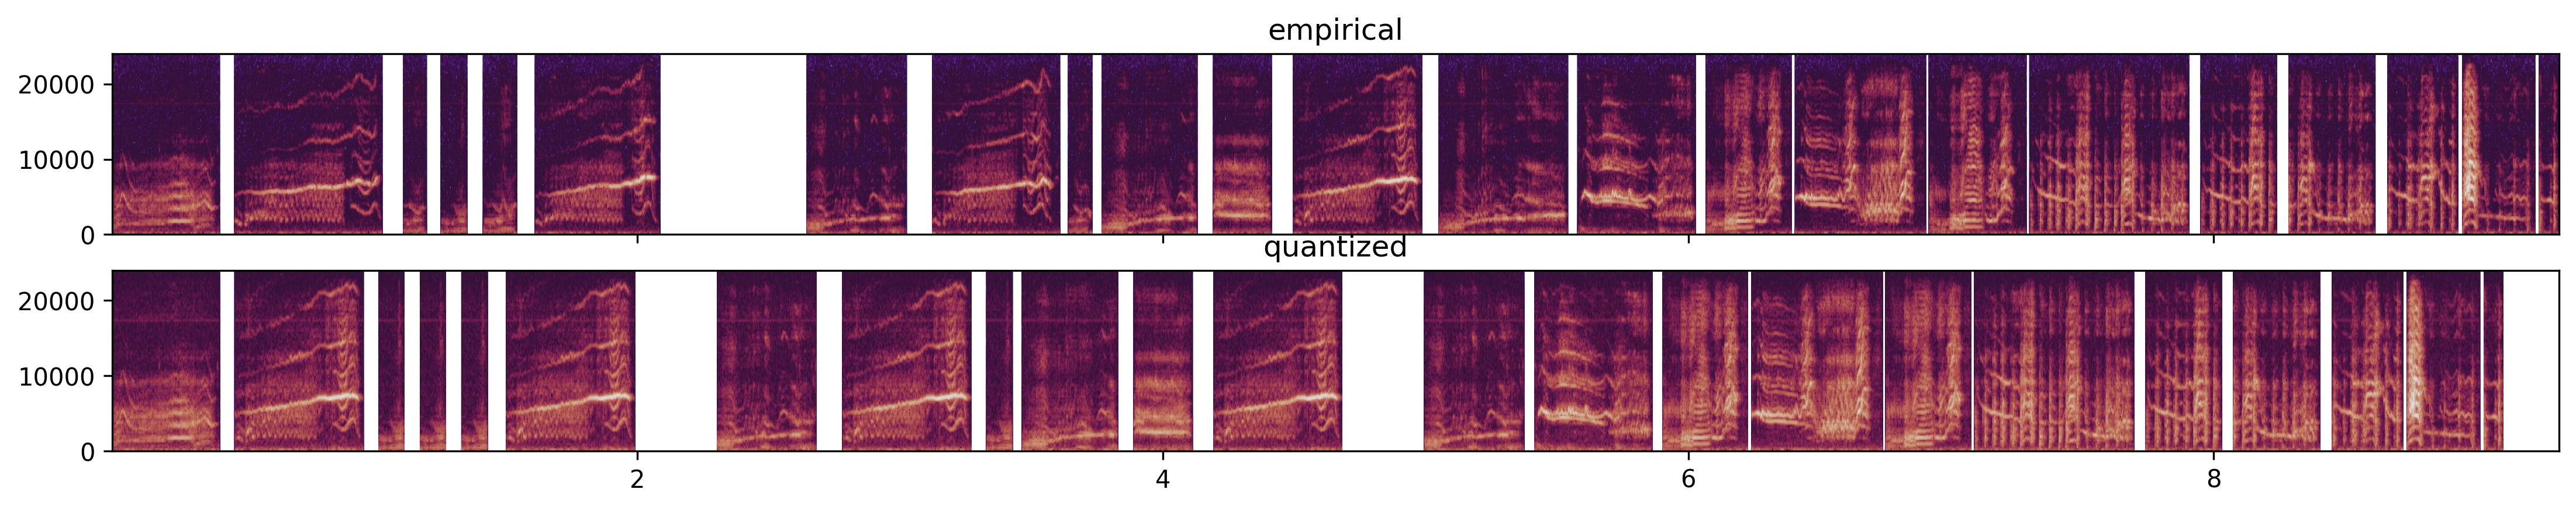

In [24]:
fig, axs = plt.subplots(2, sharex = True, figsize=(18, 3), dpi=300)
axs[0].title.set_text('empirical')
emp_sr, emp_data = read(select_df[select_df['type'] == 'empirical'].file.values[0])
x = axs[0].specgram(emp_data, Fs = emp_sr, cmap = 'twilight')
qua_sr, qua_data = read(select_df[select_df['type'] == 'quantized'].file.values[0])
axs[1].title.set_text('quantized')
y = axs[1].specgram(qua_data, Fs = 48000, cmap = 'twilight')

In [25]:
import IPython

In [26]:
IPython.display.display(IPython.display.Audio(str(select_df.file.values[0])))
IPython.display.display(IPython.display.Audio(str(select_df.file.values[1])))